In [1]:
import pickle

import pandas as pd 
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('annualCo2_annualTempAnomaly.csv')

In [4]:
dataset.isna().sum()

Annual CO₂ emissions          0
Annual Temperature Anomaly    0
dtype: int64

In [5]:
dataset.corr()

,Annual CO₂ emissions,Annual Temperature Anomaly
Annual CO₂ emissions,1.00000,0.91968
Annual Temperature Anomaly,0.91968,1.00000


<AxesSubplot:>

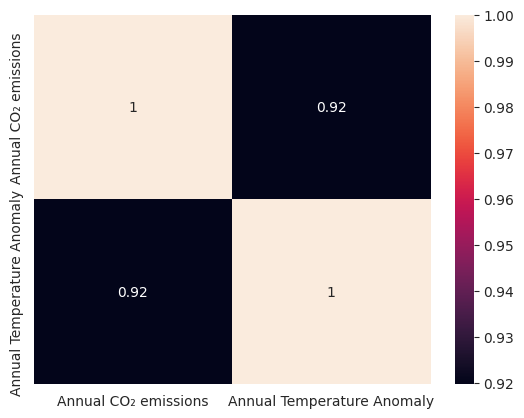

In [6]:
import seaborn as sns

sns.heatmap(dataset.corr(), annot=True)

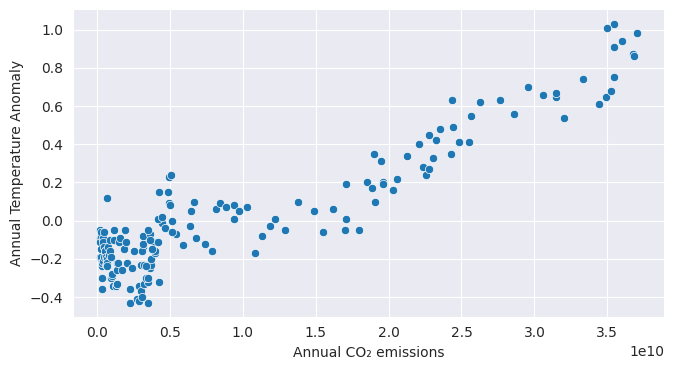

In [7]:
sns.relplot(x='Annual CO₂ emissions', y='Annual Temperature Anomaly', data=dataset,
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

In [23]:
# column = "Wind (TWh, direct energy)"
# 
# new_dataset = dataset[["Population Increase", column]]
# new_dataset = new_dataset[new_dataset[column] != 0]

X = dataset[["Annual CO₂ emissions"]].values  # feature matrix
y = dataset["Annual Temperature Anomaly"].values  # response vector

In [17]:
y

array([  196751970,   198668110,   207414200,   217120430,   255033170,
         260104400,   277296450,   279932000,   284225150,   301481250,
         330962600,   347785820,   354488900,   378180160,   407725980,
         432859140,   446553600,   478160740,   491551940,   521954200,
         533338270,   566891300,   627301250,   666481200,   624232500,
         677113860,   686780200,   700404400,   705973570,   755990460,
         853916350,   883544060,   933360100,   992753600,  1004134100,
        1011637100,  1027417500,  1078746900,  1194352600,  1194624000,
        1300362400,  1361750100,  1372396500,  1355477200,  1403019100,
        1487432300,  1536365600,  1609231600,  1697166300,  1853709200,
        1952209500,  2016744400,  2067683800,  2254100200,  2279747300,
        2427318300,  2534733000,  2888318000,  2776440800,  2890495000,
        3034089700,  3079502000,  3235963600,  3506275800,  3180355600,
        3134854000,  3385858300,  3540426800,  3493264100,  3029

In [24]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# 
# X_poly = poly.fit_transform(X.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(154, 1)
(18, 1)
(154,)
(18,)


Estimators: 10
Train score: 0.9787729125028576
Test score: 0.8311382551486597
Score: 4.645077731994728
-----------------------------------
Estimators: 20
Train score: 0.9839436188895276
Test score: 0.8371805163189763
Score: 4.677874391039645
-----------------------------------
Estimators: 50
Train score: 0.9832808153464327
Test score: 0.843358350523322
Score: 4.708432160289826
-----------------------------------
Estimators: 100
Train score: 0.9825643628141388
Test score: 0.8344921828030235
Score: 4.663743095422188
-----------------------------------
Estimators: 250
Train score: 0.9840743123869687
Test score: 0.8444870165262094
Score: 4.7144722388245315
-----------------------------------
Estimators: 500
Train score: 0.984589073564179
Test score: 0.8507533853241177
Score: 4.746061463402678
-----------------------------------
Estimators: 750
Train score: 0.984120238986733
Test score: 0.84599540745752
Score: 4.722037156780967
-----------------------------------
Estimators: 1000
Train scor

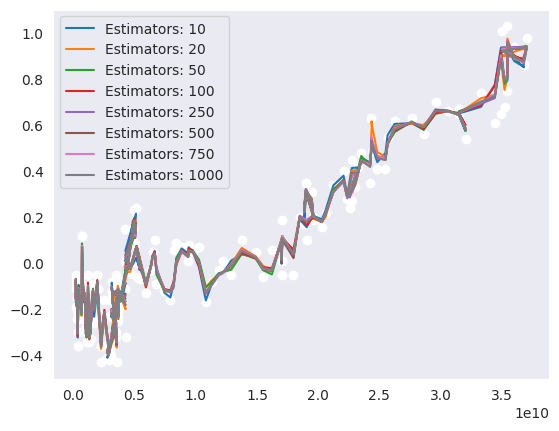

Max score: 4.746984764572742
Max score estimator: 1000


RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=0)

In [25]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

estimators = [10, 20, 50, 100, 250, 500, 750, 1000]
# colors = ['red', 'green', 'blue', 'yellow', 'black']

maxScoreEstimator = 0
maxScore = -2147483648
for i in estimators:
    regressorTest = RandomForestRegressor(n_estimators=i, n_jobs=-1)
    regressorTest.fit(X_train, y_train)
    trainScore = regressorTest.score(X_train, y_train)
    testScore = regressorTest.score(X_test, y_test)
    print(f"Estimators: {i}")
    print(f"Train score: {trainScore}")
    print(f"Test score: {testScore}")
    score = (trainScore / 2) + (testScore * 5)
    print(f"Score: {score}")
    y_predict = regressorTest.predict(X)
    

    if score > maxScore:
        maxScore = score
        maxScoreEstimator = i
    plt.plot(X, y_predict, label=f"Estimators: {i}")
    print("-----------------------------------")
# regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
# regressor.fit(X_train, y_train)
plt.scatter(X, y, color='white')
plt.legend()
plt.show()

print(f"Max score: {maxScore}")
print(f"Max score estimator: {maxScoreEstimator}")

regressor = RandomForestRegressor(n_estimators=maxScoreEstimator, oob_score=True, random_state=0, n_jobs=-1)
regressor.fit(X_train, y_train)

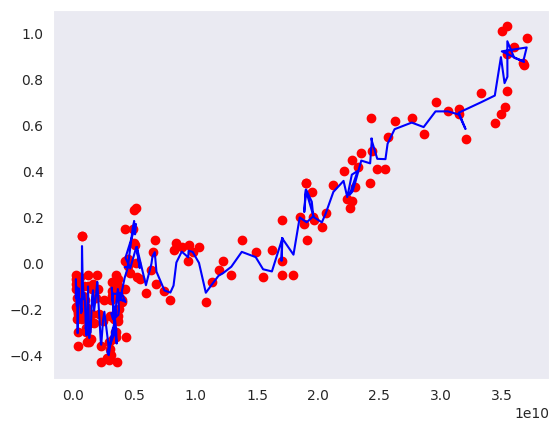

In [26]:
y_predict = regressor.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, y_predict, color='blue')

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.18405,  0.00191, -0.15752, -0.35119, -0.35243,  0.89598,
        0.00367, -0.1306 ,  0.0713 , -0.09653, -0.30364, -0.11298,
       -0.0424 , -0.25547, -0.03512,  0.10988,  0.54238, -0.28516])

In [28]:
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comparison_df

,Actual,Predicted
0,0.09,0.18405
1,0.07,0.00191
2,-0.06,-0.15752
3,-0.23,-0.35119
4,-0.36,-0.35243
5,0.65,0.89598
6,0.09,0.00367
7,-0.21,-0.13060
8,-0.06,0.07130
9,0.06,-0.09653


In [29]:
residuals = y_test - y_pred
residuals

array([-0.09405,  0.06809,  0.09752,  0.12119, -0.00757, -0.24598,
        0.08633, -0.0794 , -0.1313 ,  0.15653,  0.00364,  0.04298,
        0.0524 , -0.00453,  0.09512, -0.09988, -0.05238, -0.00484])

Text(0, 0.5, 'Predictions')

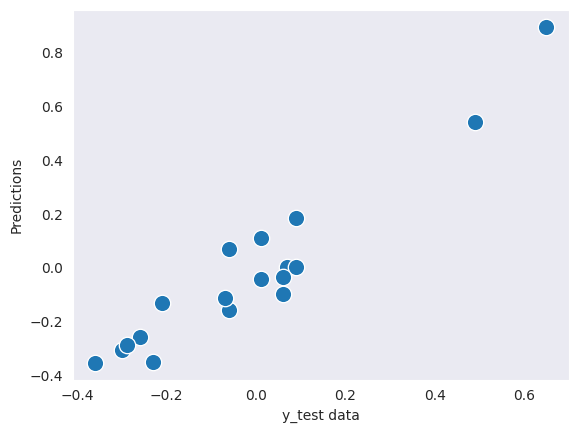

In [30]:
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [32]:
import pickle

pickle.dump(regressor, open('annualtemp-annualco2.pkl', 'wb'))

In [33]:
# import pickle
# model = pickle.load(open('populationincrease-annualco2.pkl','rb'))
print(regressor.score(X_test, y_test))
print(regressor.score(X_train, y_train))

0.8455114218923483
0.9846545324930598


In [34]:
import numpy as np

test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred), cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])


Test set evaluation:
_____________________________________
MAE: 0.08020722222222142
MSE: 0.010008809549999711
RMSE: 0.10004403805324788
R2 Square 0.8455114218923483
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03365629870129872
MSE: 0.0018295627811688205
RMSE: 0.042773388703361115
R2 Square 0.9846545324930598
__________________________________


In [33]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3017047152.5089083

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8455114218923483